In [1]:
#importing dependencies
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#loadig dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data=pd.read_csv('daily-bike-share.csv')
bike_data['day']=pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())

--2023-06-05 18:25:05--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: ‘daily-bike-share.csv.1’

daily-bike-share.cs 100%[===================>]  47.66K  --.-KB/s    in 0.006s  

2023-06-05 18:25:05 (7.37 MB/s) - ‘daily-bike-share.csv.1’ saved [48800/48800]

   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0       

In [5]:
#spliting data
X,y=bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)


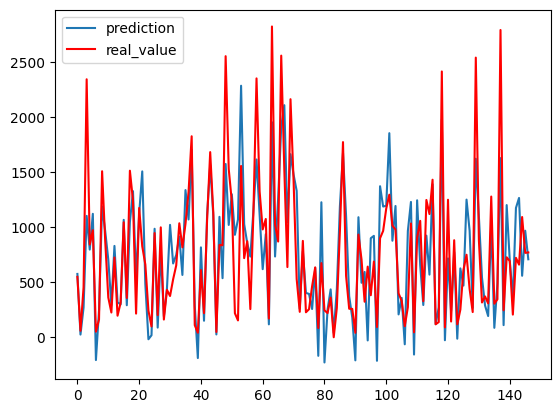

In [15]:
from sklearn.linear_model import Lasso 
model=Lasso().fit(X_train,y_train)
predictions=model.predict(X_test)
plt.plot(predictions,label='prediction')
plt.plot(y_test,color='red',label='real_value')
plt.legend()
plt.show()

In [12]:
#scores 
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 135332.85241155067
RMSE: 367.8761373228096
R2: 0.6526394821252619


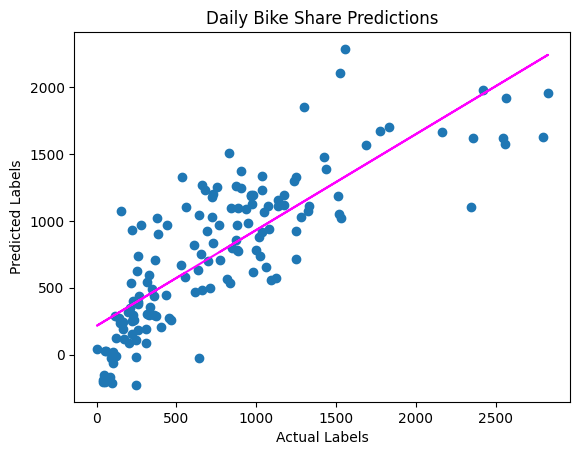

In [13]:
# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [16]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor().fit(X_train,y_train)
print(model)

DecisionTreeRegressor()


In [17]:
from sklearn.tree import export_text
tree= export_text(model)
print(tree)

|--- feature_7 <= 0.42
|   |--- feature_6 <= 0.32
|   |   |--- feature_6 <= 0.27
|   |   |   |--- feature_1 <= 2.50
|   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |--- feature_7 <= 0.18
|   |   |   |   |   |   |--- feature_9 <= 0.26
|   |   |   |   |   |   |   |--- feature_9 <= 0.25
|   |   |   |   |   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_6 <= 0.13
|   |   |   |   |   |   |   |   |   |   |--- value: [150.00]
|   |   |   |   |   |   |   |   |   |--- feature_6 >  0.13
|   |   |   |   |   |   |   |   |   |   |--- value: [196.00]
|   |   |   |   |   |   |   |   |--- feature_3 >  0.50
|   |   |   |   |   |   |   |   |   |--- feature_8 <= 0.68
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [93.00]
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [117.00]
|   |   |   |   |   |   |   |   |   |---

MSE: 171655.6326530612
RMSE: 414.3134473476105
R2: 0.5594093496739597


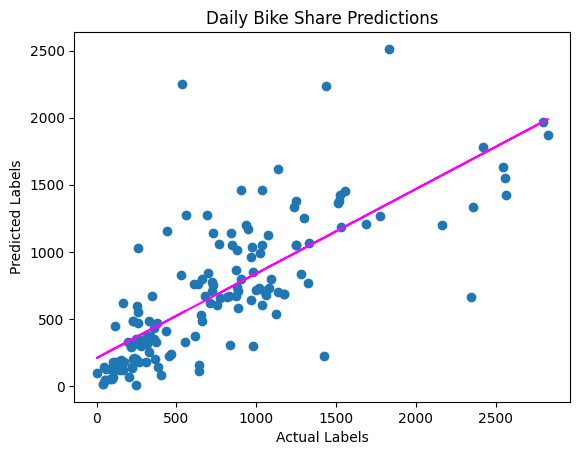

In [20]:
# Evaluate the model using the test data
predictions_tree = model.predict(X_test)
mse = mean_squared_error(y_test, predictions_tree)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions_tree)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions_tree)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions_tree, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

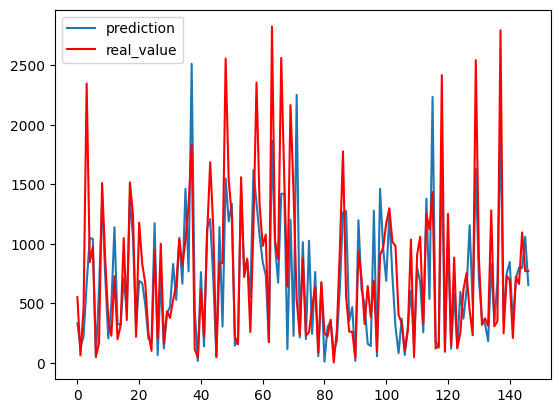

In [21]:
plt.plot(predictions_tree,label='prediction')
plt.plot(y_test,color='red',label='real_value')
plt.legend()
plt.show()

RandomForestRegressor() 

MSE: 85302.36232040817
RMSE: 292.0656815177164
R2: 0.7810533641790991


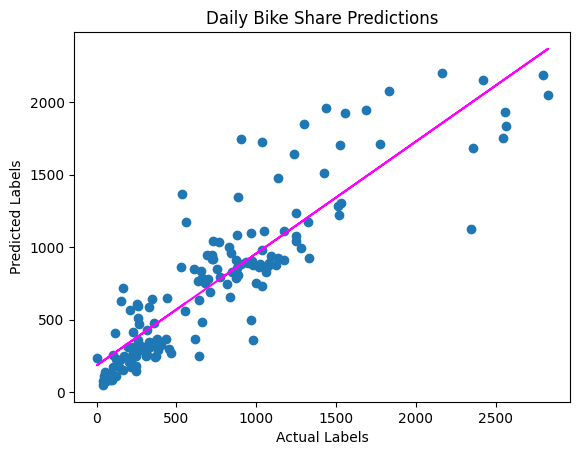

In [22]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions_ensemble = model.predict(X_test)
mse = mean_squared_error(y_test, predictions_ensemble)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions_ensemble)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions_ensemble)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions_ensemble, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

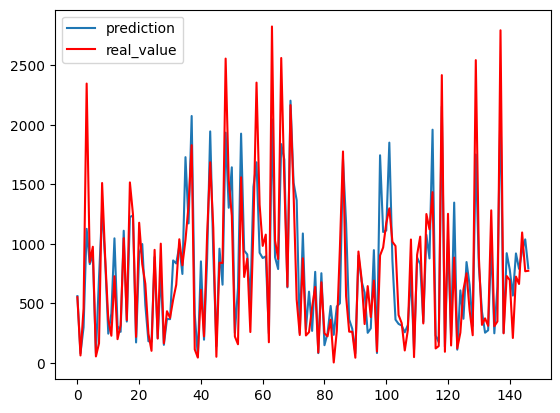

In [23]:
plt.plot(predictions_ensemble,label='prediction')
plt.plot(y_test,color='red',label='real_value')
plt.legend()
plt.show()